In [216]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

red = '#e8321b'
blue = '#1b69e8'

In [217]:
import os
import pandas as pd

In [218]:
path = '../sparse/pretraining_output-small-300k/eval_results_att.txt'

Load vocabulary

In [219]:
vocab = pd.read_csv('../sparse/sparse_tmp_vocab-code.txt', header=None)
vocab.shape

(1156, 1)

Load predictions results

In [220]:
results_df = pd.read_csv('../sparse/pretraining_output-300k/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,53,53,11,2,6,111,127,7,576,1142,...,0,0,0,0,0,0,0,0,0,0
1,38,38,8,2,139,25,387,81,38,25,...,0,0,0,0,0,0,0,0,0,0
2,206,206,9,2,6,44,426,104,25,237,...,0,0,0,0,0,0,0,0,0,0
3,25,25,30,2,6,53,25,25,426,237,...,0,0,0,0,0,0,0,0,0,0
4,289,289,11,2,6,44,25,140,43,237,...,0,0,0,0,0,0,0,0,0,0
5,25,25,6,2,7,576,111,678,53,4,...,0,0,0,0,0,0,0,0,0,0
6,1142,1142,16,2,53,1142,193,25,253,426,...,0,0,0,0,0,0,0,0,0,0
7,25,25,14,2,398,253,426,426,426,426,...,0,0,0,0,0,0,0,0,0,0
8,53,53,34,2,57,58,59,107,59,42,...,0,0,0,0,0,0,0,0,0,0
9,25,25,12,2,398,38,38,53,1142,50,...,0,0,0,0,0,0,0,0,0,0


Get the prediction specific to this attention matrix

In [221]:
pred = list(results_df.loc[0][3:])
pred_str = [vocab.loc[i][0] for i in pred]
pred_str

['[CLS]',
 'if',
 'boolop',
 'and',
 'unaryop',
 'not',
 'attribute',
 'inputs',
 'name',
 'name',
 'expr',
 '[MASK]',
 'attribute',
 'build',
 'name',
 'name',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [222]:
# Actual sentence length, unpadded
emb_len = np.count_nonzero(pred)

In [223]:
print(' '.join(pred_str[:emb_len]))
print('Label =', vocab.loc[results_df.loc[0][0]][0])
print('Pred  =', vocab.loc[results_df.loc[0][1]][0])

[CLS] if boolop and unaryop not attribute inputs name name expr [MASK] attribute build name name
Label = call
Pred  = call


Read the attention values

In [224]:
ar = np.asarray(pd.read_csv(path, sep=' ', header=None))[:,:-1]
ar.shape

(18, 4096)

In [225]:
depth = 3
nb_heads = 6
seq_len  = 64
attention = ar.reshape((depth, nb_heads, seq_len, seq_len))

Plot attention matrices

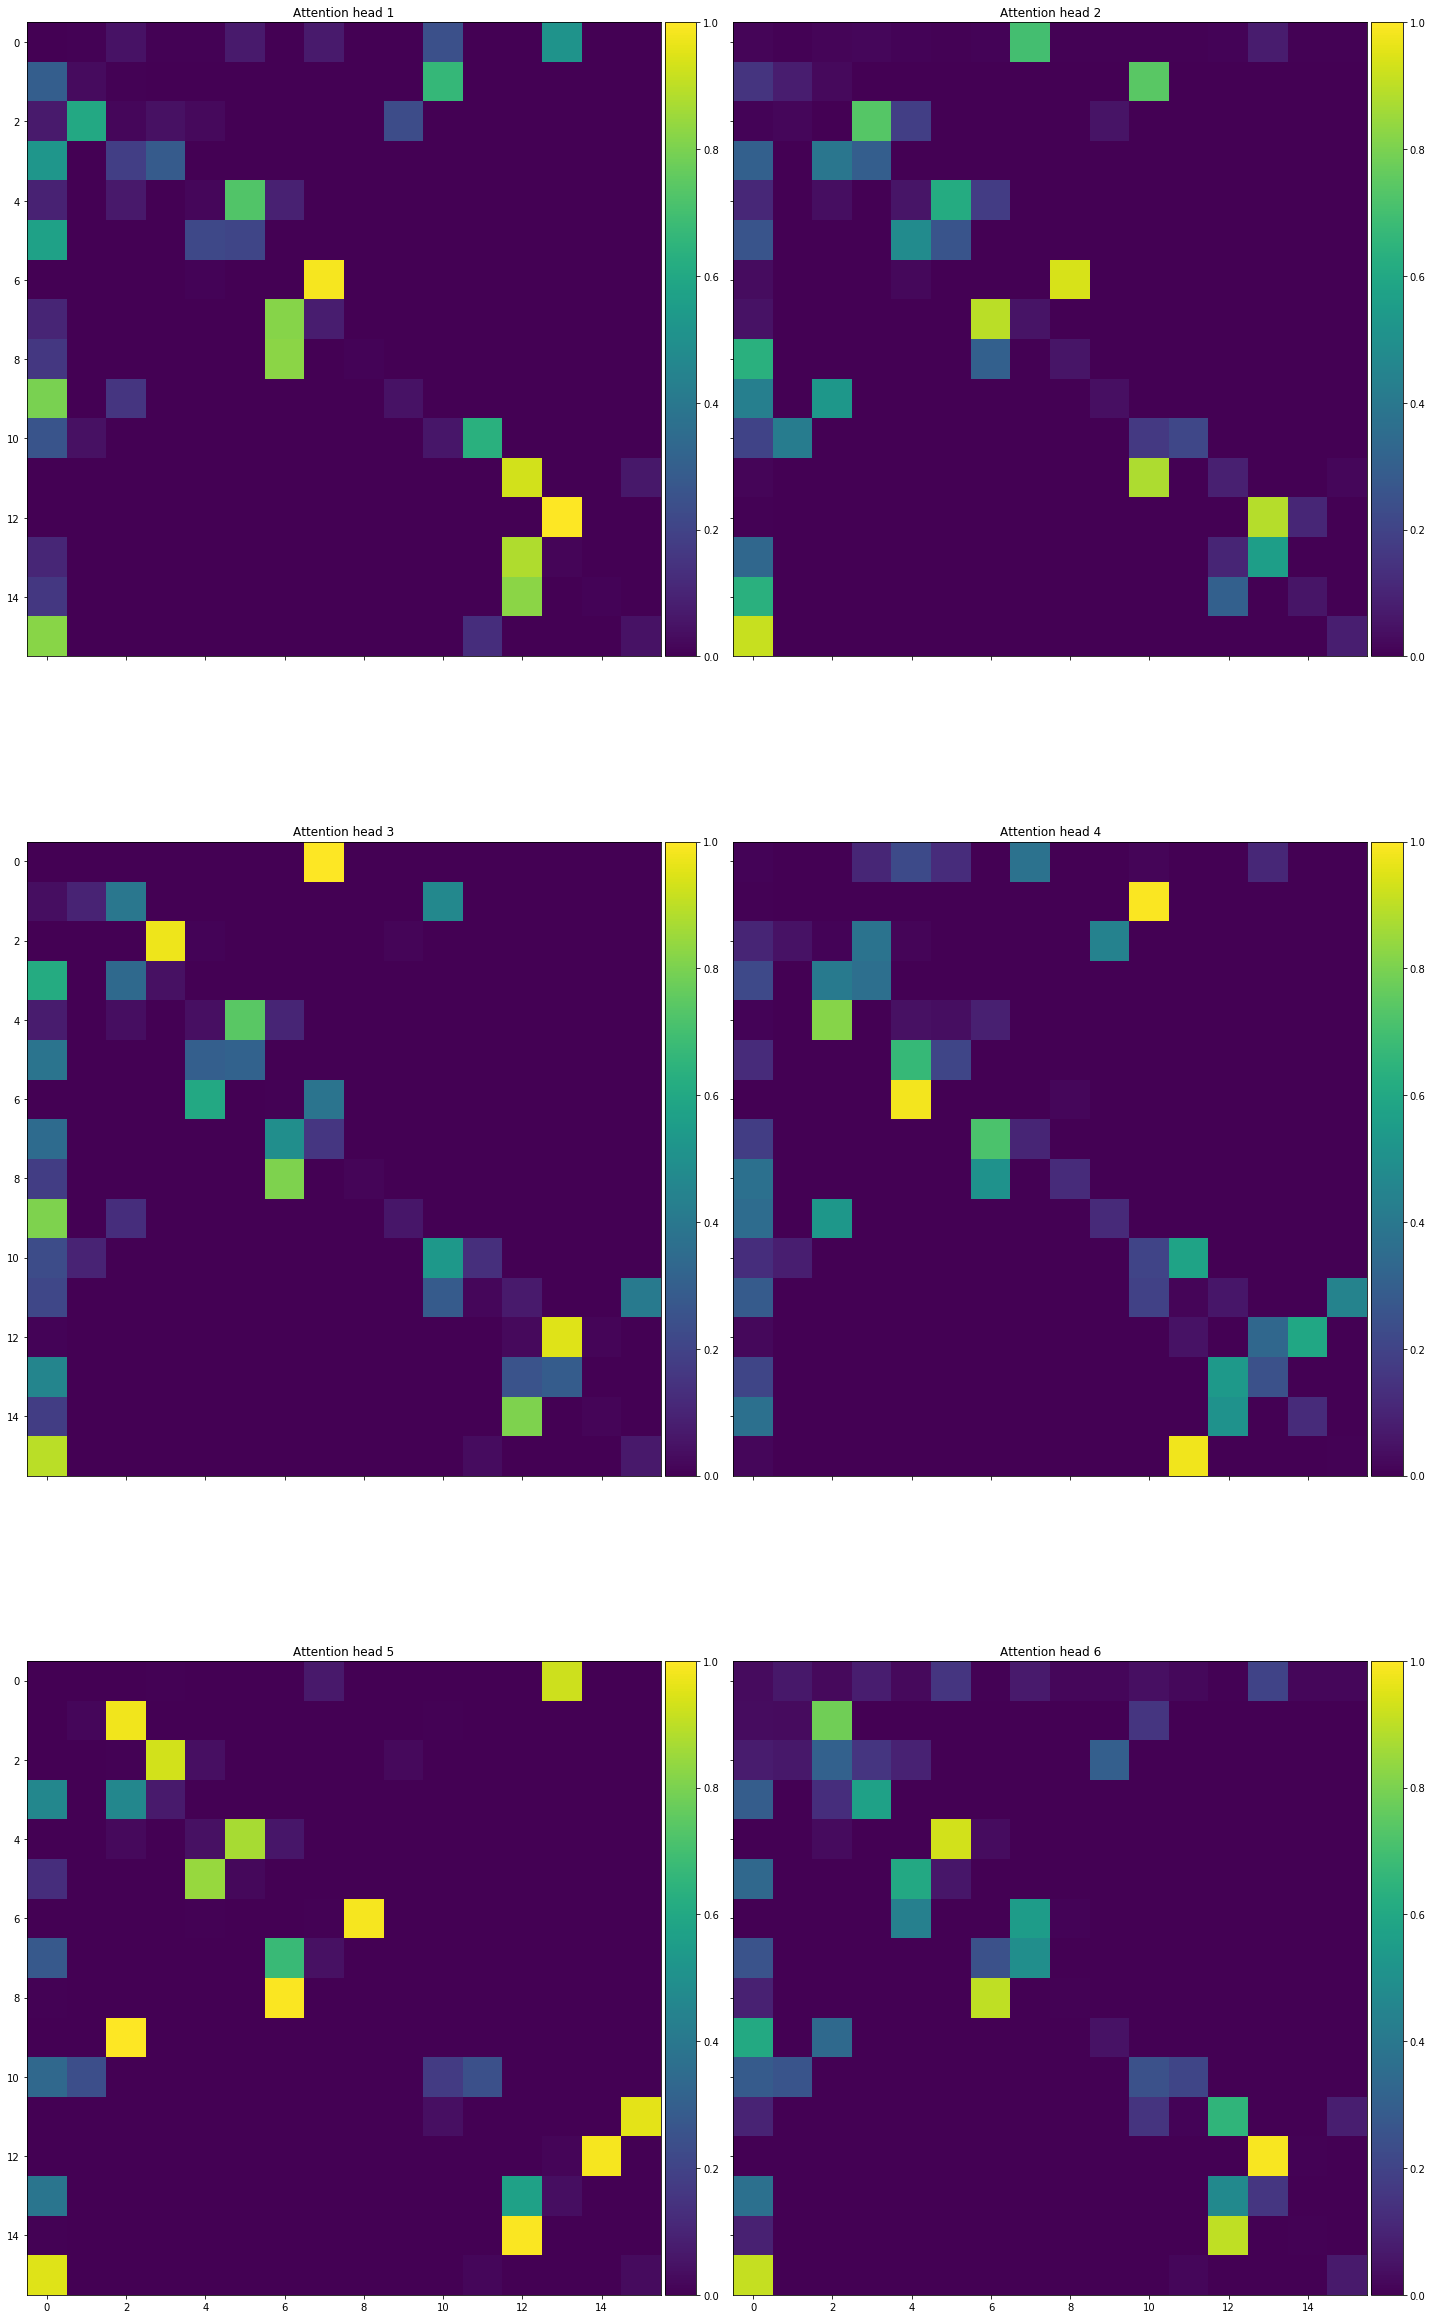

In [227]:
f, axes = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,40))
#f.suptitle('Attention head probabilities (Layer #12)')
d = 0
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(attention[d, i, :emb_len, :emb_len])
    ax.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    plt.tight_layout()
plt.show()

Load adjacency matrix

In [228]:
from scipy import io

In [229]:
m = io.mmread('../sparse/adj/'+str(0)+'_sparse_mlm_split_magret_adj_val.mtx')
A = m.toarray()
A.shape

(64, 64)

In [230]:
#adj_df = pd.read_csv('../funcname_magret/cls_with_funcsplit_magret_adj_single.txt', header=None)
#A = np.asarray(adj_df)

In [231]:
import networkx as nx

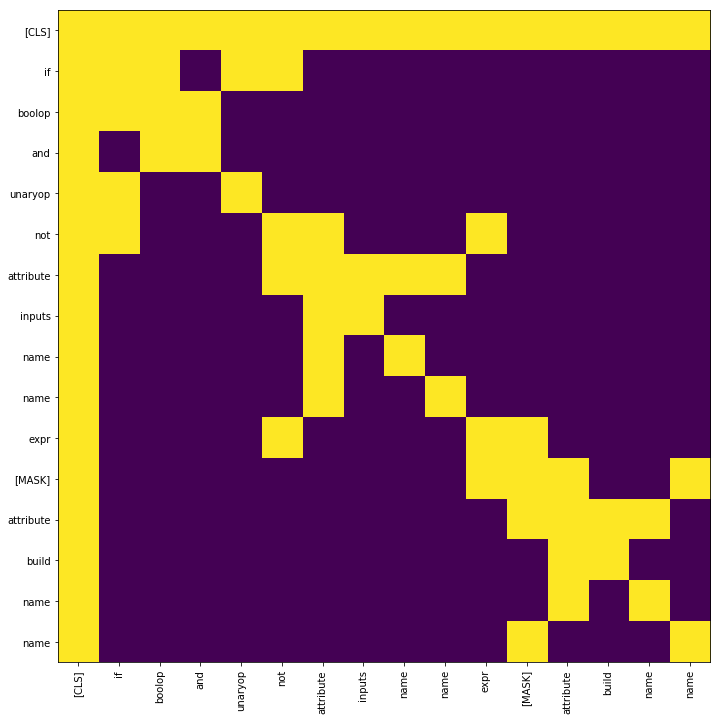

In [232]:
plt.figure(figsize=(12,12))
plt.imshow(A[:emb_len,:emb_len])
plt.xticks(range(emb_len), pred_str[:emb_len], rotation=90);
plt.yticks(range(emb_len), pred_str[:emb_len]);

In [233]:
A[emb_len-1,:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [234]:
G=nx.from_numpy_matrix(A[:emb_len,:emb_len])
#G.remove_node(0)

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


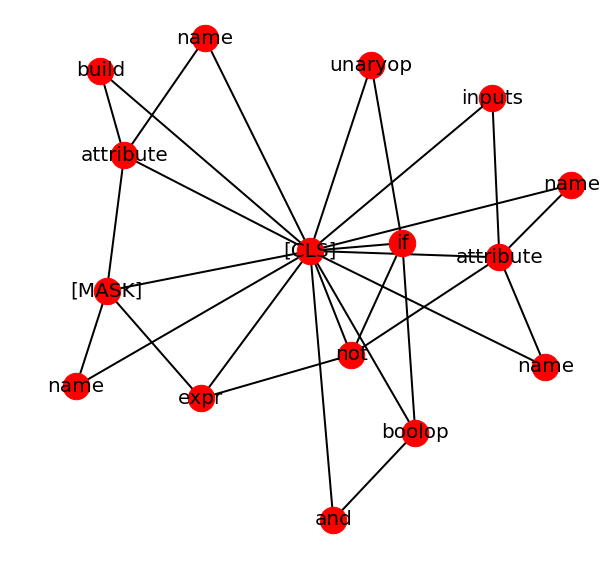

In [235]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [236]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [237]:
cls_edges = list(G.edges(0))
G.remove_edges_from(cls_edges)

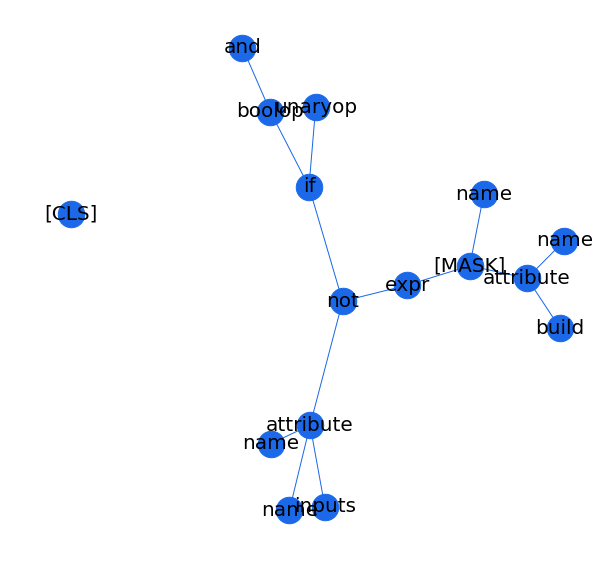

In [238]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=blue)
# edges
nx.draw_networkx_edges(G, pos, width=1, edge_color=blue)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

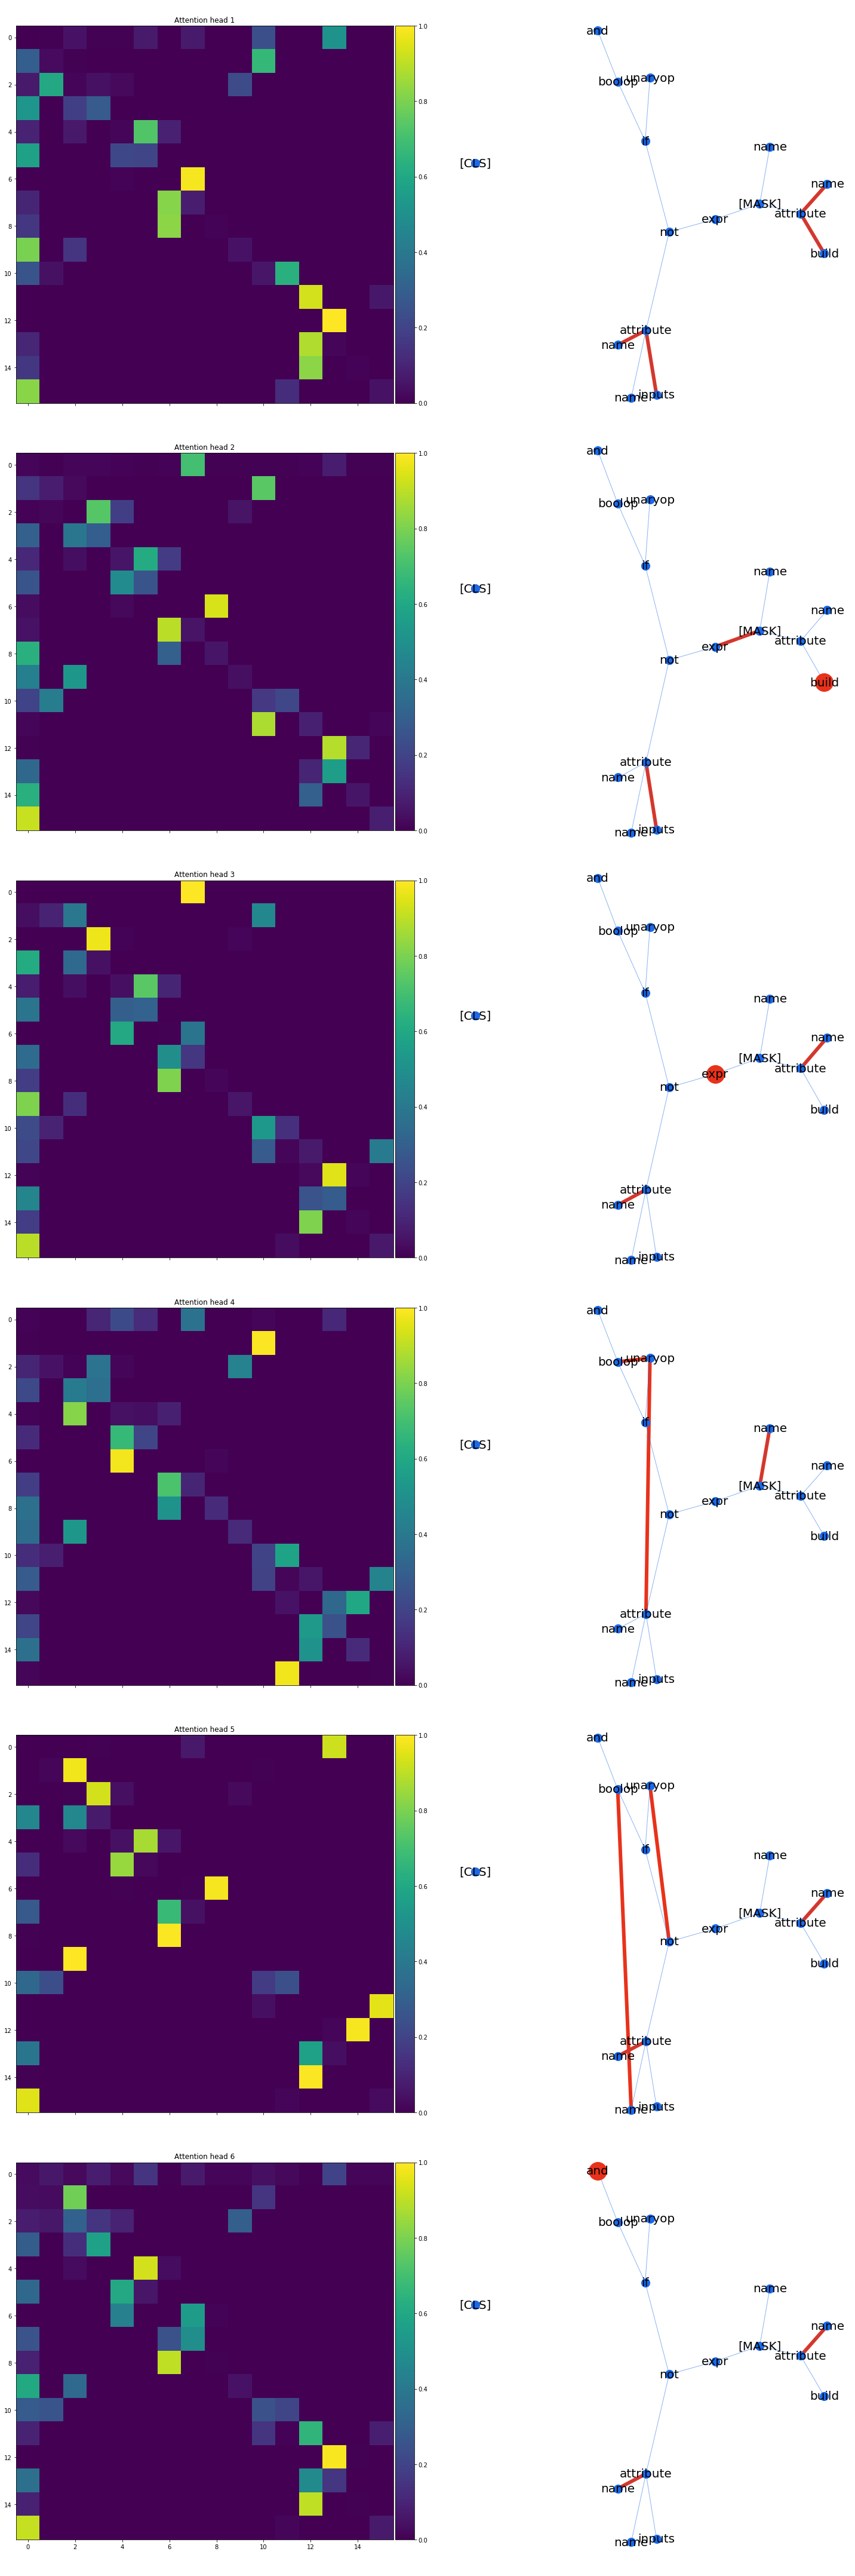

In [241]:
f, axes = plt.subplots(nb_heads, 2, sharex='col', figsize=(20,60))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(emb_len),pred_str[:emb_len]))

d= 0
#f.suptitle('Attention head probabilities (Layer #12)')
for i, (ax0, ax1) in enumerate(axes):
    # Attention map
    im = ax0.imshow(attention[d, i, :emb_len, :emb_len])
    ax0.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    # -----------------------------------------------------
    # graph
    Gi = nx.from_numpy_matrix(attention[d, i, :emb_len, :emb_len])
    #Gi.remove_node(0)
    
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.8) & (u>0)]
    #elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & (d['weight'] <= 0.8)& (u>0)]
    #esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 0.5) & (d['weight'] > 0.01) & (u>0)]
    esmall  = [(u, v) for (u, v) in G.edges() if (u>0)]
    
    lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
    sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

    # nodes
    nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax1, node_color=red)
    nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax1, node_color=blue)

    # edges
    nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax1, edge_color=red)
    #nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax1, edge_color=red, style='dashed')
    nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax1, alpha=0.5, edge_color=blue)

    # labels
    nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax1)

    ax1.axis('off')

    plt.tight_layout()
    
plt.show()

In [242]:
dict(zip(range(emb_len),pred_str[:emb_len]))

{0: '[CLS]',
 1: 'if',
 2: 'boolop',
 3: 'and',
 4: 'unaryop',
 5: 'not',
 6: 'attribute',
 7: 'inputs',
 8: 'name',
 9: 'name',
 10: 'expr',
 11: '[MASK]',
 12: 'attribute',
 13: 'build',
 14: 'name',
 15: 'name'}

In [243]:
Gi.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 1), (1, 2), (1, 10), (2, 2), (2, 3), (2, 4), (2, 9), (3, 3), (4, 4), (4, 5), (4, 6), (5, 5), (6, 8), (6, 6), (6, 7), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (11, 11), (11, 12), (11, 15), (12, 12), (12, 13), (12, 14), (13, 13), (14, 14), (15, 15)])

In [244]:
from scipy.stats import entropy

In [261]:
idx = np.nonzero(A)
uni = np.zeros(A.shape)
uni.shape
for (i,j) in zip(*idx):
    uni[i,j] = np.random.uniform()
uniform_ent = entropy(uni,base=2)

In [263]:
attention.shape

(3, 6, 64, 64)

In [295]:
def plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=0):
    
    ent = [entropy(a[:emb_len,:emb_len],base=2) for a in attention[d]]
    f, axes = plt.subplots(nb_heads//2, 2, sharex='col', figsize=(20,12))
    
    for i, (ax0, ax1) in enumerate(axes):
        ent[i][np.isnan(ent[i])]=5.36
        ax0.hist(ent[i],bins=20);
        ax0.set_xticks(range(7))
        ax0.set_yticks(range(5))
        ax1.hist(ent[i+1],bins=20);
        ax1.set_xticks(range(7))
        ax1.set_yticks(range(5))
    plt.figure(figsize=(20,4));
    plt.hist(uniform_ent, bins=20);
    plt.xticks(range(7));
    #plt.yticks(range(5));

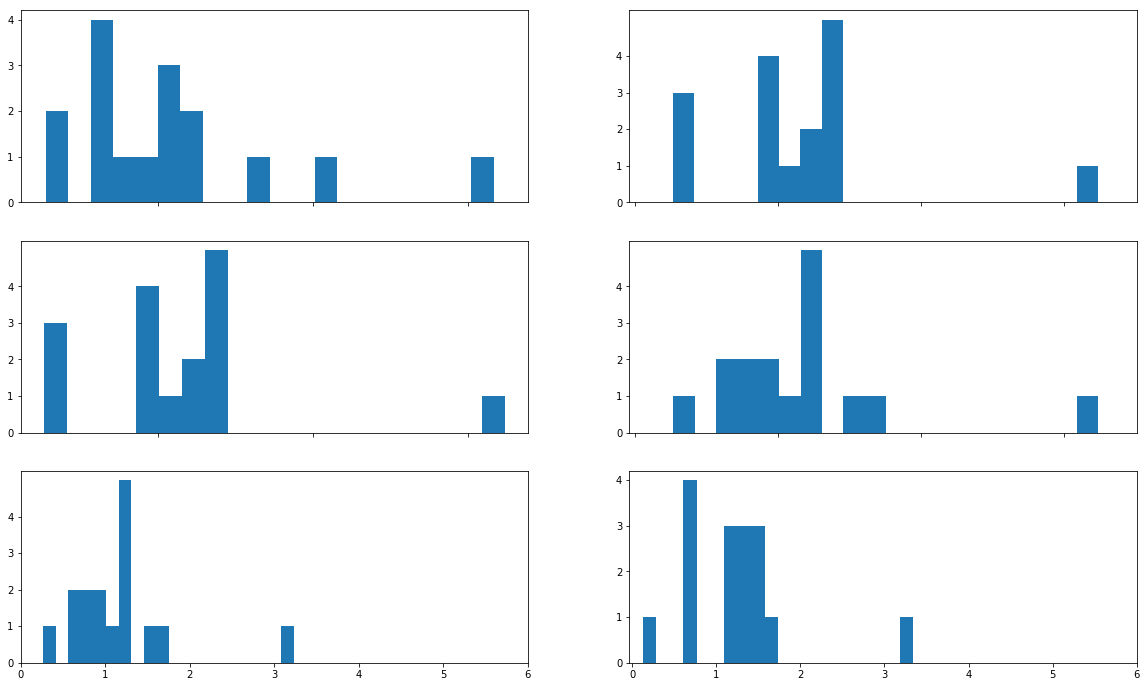

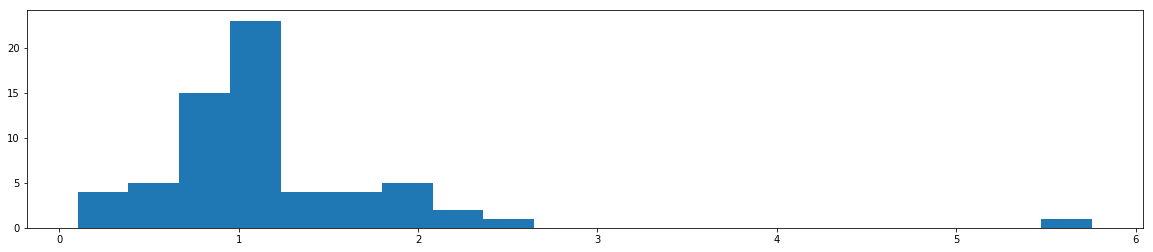

In [296]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent)

In [ ]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=1)

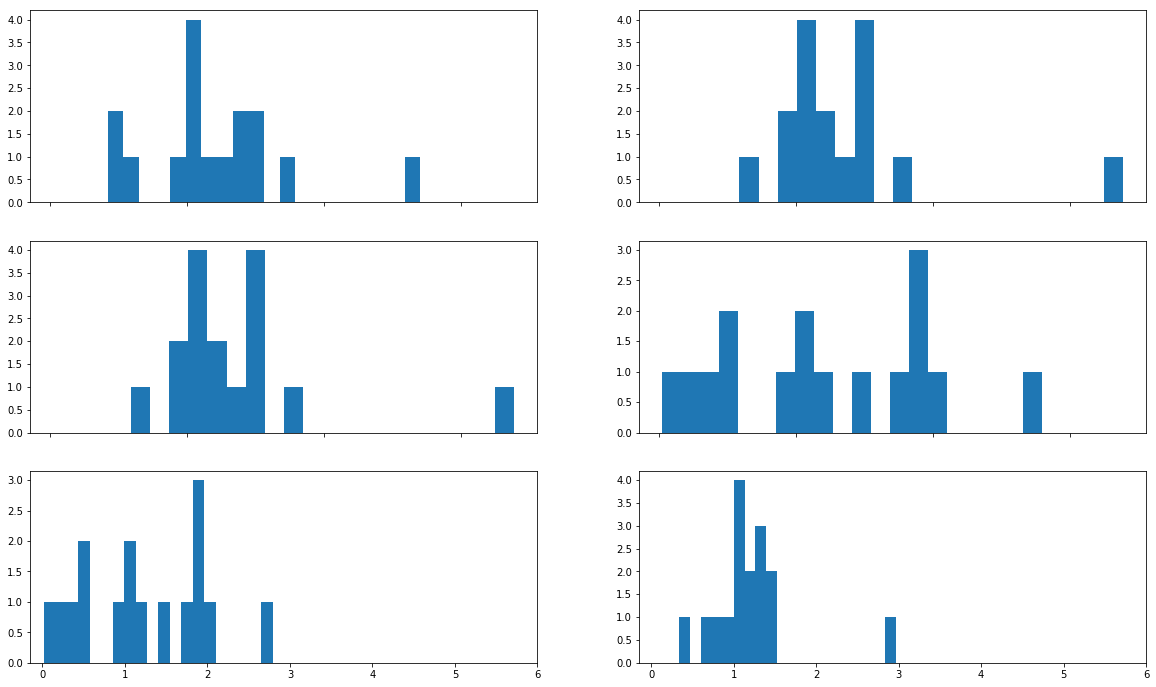

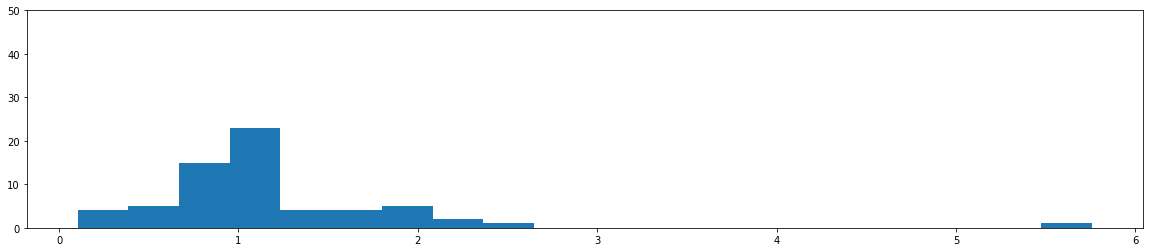

In [291]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=2)

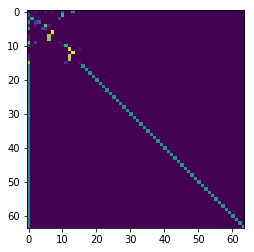

In [260]:
plt.imshow(attention[0,0])